In [1]:

from google.colab import drive
drive.mount('/content/gdrive')
# %cd /content/gdrive/My\ Drive/Assignment/
%cd /content/gdrive/MyDrive/ERA/Session9


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/ERA/Session9


In [2]:
! pwd

/content/gdrive/MyDrive/ERA/Session9


In [3]:
! ls

data			  net.py		testing.py
dataset_albumentation.py  __pycache__		trainalbumentation.py
dataset_.py		  session9.ipynb	training.py
Dataset.py		  testalbumentation.py


In [3]:
! pip install -U albumentations

In [4]:
%matplotlib inline
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [5]:
import Dataset as ds

trainloader = ds.trainloader
testloader =  ds.testloader
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Files already downloaded and verified


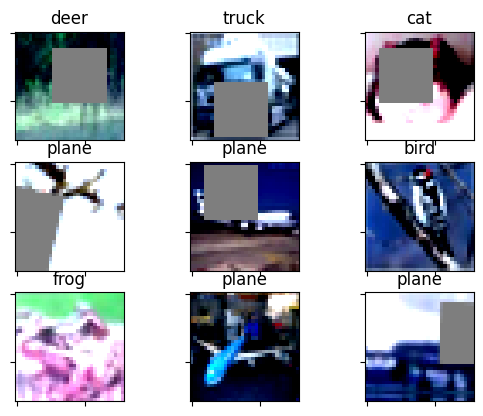

In [6]:

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
# print labels
for i in range(0,9):
 plt.subplot(3, 3, i+1)
 frame1 = plt.gca()
 frame1.axes.xaxis.set_ticklabels([])
 frame1.axes.yaxis.set_ticklabels([])
 plt.imshow(np.transpose(((images[i]/2)+0.5).numpy(),(1,2,0)))
 plt.title(classes[labels[i]])

In [13]:
import net
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
net = net.Net('bn').to(device)
summary(net, input_size=(3, 32, 32))

cuda
####Batch Norm
####Batch Norm
####Batch Norm
####Batch Norm
####Batch Norm
####Batch Norm
####Batch Norm
####Batch Norm
####Batch Norm
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           4,608
       BatchNorm2d-6           [-1, 32, 32, 32]              64
              ReLU-7           [-1, 32, 32, 32]               0
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 32, 16, 16]           9,216
      BatchNorm2d-10           [-1, 32, 16, 16]              64
             ReLU-11           [-1, 32, 16, 16]               0
          Dropout-12       

In [15]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
import torch.nn as nn
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9, weight_decay=0.0001)
# optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.001, max_lr=0.1, step_size_up=7, step_size_down=13, mode='triangular')
#scheduler = StepLR(optimizer, step_size=10, gamma=0.5)

In [16]:
import torch
from tqdm import tqdm
import training, testing
#import test
test_acc = []
train_acc = []
for epoch in range(50):  # loop over the dataset multiple times
    scheduler.step()
    for param_group in optimizer.param_groups:
      print("lr= ",param_group['lr'])
    train_acc.append(training.train(net, device, trainloader, optimizer, criterion, epoch))
    test_acc.append(testing.test(net, device, testloader))
print('Finished Training')

lr=  0.015142857142857156


100%|██████████| 391/391 [00:27<00:00, 14.27it/s]


Epoch= 0 Loss=1.65975022315979 Accuracy=35.00


100%|██████████| 79/79 [00:06<00:00, 12.54it/s]


Accuracy of the network on the 10000 test images: 50 %
lr=  0.029285714285714314


100%|██████████| 391/391 [00:28<00:00, 13.56it/s]


Epoch= 1 Loss=1.3816490173339844 Accuracy=48.75


100%|██████████| 79/79 [00:07<00:00, 10.38it/s]


Accuracy of the network on the 10000 test images: 55 %
lr=  0.04342857142857141


100%|██████████| 391/391 [00:26<00:00, 14.58it/s]


Epoch= 2 Loss=1.349853515625 Accuracy=51.25


100%|██████████| 79/79 [00:05<00:00, 13.52it/s]


Accuracy of the network on the 10000 test images: 65 %
lr=  0.05757142857142856


100%|██████████| 391/391 [00:28<00:00, 13.68it/s]


Epoch= 3 Loss=1.172783374786377 Accuracy=68.75


100%|██████████| 79/79 [00:04<00:00, 16.33it/s] 


Accuracy of the network on the 10000 test images: 68 %
lr=  0.07171428571428572


100%|██████████| 391/391 [00:30<00:00, 12.93it/s]


Epoch= 4 Loss=1.1757110357284546 Accuracy=61.25


100%|██████████| 79/79 [00:04<00:00, 16.65it/s]


Accuracy of the network on the 10000 test images: 69 %
lr=  0.08585714285714288


100%|██████████| 391/391 [00:27<00:00, 14.17it/s]


Epoch= 5 Loss=1.0481168031692505 Accuracy=67.50


100%|██████████| 79/79 [00:06<00:00, 12.52it/s]


Accuracy of the network on the 10000 test images: 67 %
lr=  0.09999999999999998


100%|██████████| 391/391 [00:26<00:00, 14.52it/s]


Epoch= 6 Loss=0.8519647717475891 Accuracy=72.50


100%|██████████| 79/79 [00:06<00:00, 11.68it/s]


Accuracy of the network on the 10000 test images: 69 %
lr=  0.0923846153846154


100%|██████████| 391/391 [00:27<00:00, 14.09it/s]


Epoch= 7 Loss=1.1195509433746338 Accuracy=67.50


100%|██████████| 79/79 [00:05<00:00, 14.21it/s] 


Accuracy of the network on the 10000 test images: 74 %
lr=  0.08476923076923078


100%|██████████| 391/391 [00:29<00:00, 13.42it/s]


Epoch= 8 Loss=1.1062631607055664 Accuracy=61.25


100%|██████████| 79/79 [00:04<00:00, 16.26it/s]


Accuracy of the network on the 10000 test images: 74 %
lr=  0.07715384615384616


100%|██████████| 391/391 [00:30<00:00, 12.89it/s]


Epoch= 9 Loss=0.9478172063827515 Accuracy=62.50


100%|██████████| 79/79 [00:06<00:00, 12.19it/s]


Accuracy of the network on the 10000 test images: 75 %
lr=  0.06953846153846154


100%|██████████| 391/391 [00:30<00:00, 12.66it/s]


Epoch= 10 Loss=0.9110304117202759 Accuracy=67.50


100%|██████████| 79/79 [00:05<00:00, 15.38it/s] 


Accuracy of the network on the 10000 test images: 77 %
lr=  0.06192307692307691


100%|██████████| 391/391 [00:28<00:00, 13.85it/s]


Epoch= 11 Loss=0.9537383913993835 Accuracy=68.75


100%|██████████| 79/79 [00:05<00:00, 13.36it/s]


Accuracy of the network on the 10000 test images: 76 %
lr=  0.05430769230769232


100%|██████████| 391/391 [00:28<00:00, 13.75it/s]


Epoch= 12 Loss=0.8971415758132935 Accuracy=67.50


100%|██████████| 79/79 [00:06<00:00, 11.79it/s] 


Accuracy of the network on the 10000 test images: 77 %
lr=  0.0466923076923077


100%|██████████| 391/391 [00:28<00:00, 13.89it/s]


Epoch= 13 Loss=0.920350193977356 Accuracy=75.00


100%|██████████| 79/79 [00:07<00:00, 10.81it/s]


Accuracy of the network on the 10000 test images: 79 %
lr=  0.03907692307692308


100%|██████████| 391/391 [00:28<00:00, 13.80it/s]


Epoch= 14 Loss=0.8479815721511841 Accuracy=68.75


100%|██████████| 79/79 [00:06<00:00, 11.46it/s] 


Accuracy of the network on the 10000 test images: 80 %
lr=  0.03146153846153845


100%|██████████| 391/391 [00:28<00:00, 13.95it/s]


Epoch= 15 Loss=0.9161165356636047 Accuracy=70.00


100%|██████████| 79/79 [00:05<00:00, 15.10it/s]


Accuracy of the network on the 10000 test images: 79 %
lr=  0.023846153846153833


100%|██████████| 391/391 [00:30<00:00, 12.97it/s]


Epoch= 16 Loss=0.9602449536323547 Accuracy=66.25


100%|██████████| 79/79 [00:05<00:00, 15.70it/s] 


Accuracy of the network on the 10000 test images: 81 %
lr=  0.016230769230769243


100%|██████████| 391/391 [00:32<00:00, 11.90it/s]


Epoch= 17 Loss=0.7900456190109253 Accuracy=72.50


100%|██████████| 79/79 [00:05<00:00, 15.05it/s] 


Accuracy of the network on the 10000 test images: 81 %
lr=  0.008615384615384622


100%|██████████| 391/391 [00:28<00:00, 13.56it/s]


Epoch= 18 Loss=0.8530093431472778 Accuracy=71.25


100%|██████████| 79/79 [00:05<00:00, 13.30it/s]


Accuracy of the network on the 10000 test images: 82 %
lr=  0.001


100%|██████████| 391/391 [00:27<00:00, 14.06it/s]


Epoch= 19 Loss=0.7656005620956421 Accuracy=73.75


100%|██████████| 79/79 [00:06<00:00, 12.36it/s] 


Accuracy of the network on the 10000 test images: 82 %
lr=  0.015142857142857093


100%|██████████| 391/391 [00:27<00:00, 14.33it/s]


Epoch= 20 Loss=0.704835832118988 Accuracy=78.75


100%|██████████| 79/79 [00:07<00:00, 10.83it/s] 


Accuracy of the network on the 10000 test images: 82 %
lr=  0.029285714285714314


100%|██████████| 391/391 [00:27<00:00, 14.16it/s]


Epoch= 21 Loss=0.6347500085830688 Accuracy=72.50


100%|██████████| 79/79 [00:07<00:00, 10.67it/s]


Accuracy of the network on the 10000 test images: 80 %
lr=  0.04342857142857141


100%|██████████| 391/391 [00:27<00:00, 14.18it/s]


Epoch= 22 Loss=0.8068844676017761 Accuracy=72.50


100%|██████████| 79/79 [00:05<00:00, 13.95it/s] 


Accuracy of the network on the 10000 test images: 80 %
lr=  0.05757142857142863


100%|██████████| 391/391 [00:34<00:00, 11.36it/s]


Epoch= 23 Loss=1.1828882694244385 Accuracy=62.50


100%|██████████| 79/79 [00:07<00:00, 10.69it/s]


Accuracy of the network on the 10000 test images: 80 %
lr=  0.07171428571428572


100%|██████████| 391/391 [00:36<00:00, 10.57it/s]


Epoch= 24 Loss=0.7911183834075928 Accuracy=77.50


100%|██████████| 79/79 [00:05<00:00, 15.00it/s] 


Accuracy of the network on the 10000 test images: 80 %
lr=  0.08585714285714281


100%|██████████| 391/391 [00:32<00:00, 12.15it/s]


Epoch= 25 Loss=0.8478051424026489 Accuracy=72.50


100%|██████████| 79/79 [00:07<00:00, 10.20it/s]


Accuracy of the network on the 10000 test images: 80 %
lr=  0.09999999999999998


100%|██████████| 391/391 [00:28<00:00, 13.96it/s]


Epoch= 26 Loss=0.8159922361373901 Accuracy=76.25


100%|██████████| 79/79 [00:07<00:00, 10.98it/s] 


Accuracy of the network on the 10000 test images: 80 %
lr=  0.0923846153846154


100%|██████████| 391/391 [00:29<00:00, 13.28it/s]


Epoch= 27 Loss=0.7796818614006042 Accuracy=71.25


100%|██████████| 79/79 [00:06<00:00, 12.06it/s] 


Accuracy of the network on the 10000 test images: 82 %
lr=  0.08476923076923074


100%|██████████| 391/391 [00:29<00:00, 13.17it/s]


Epoch= 28 Loss=0.8660488128662109 Accuracy=75.00


100%|██████████| 79/79 [00:06<00:00, 12.84it/s]


Accuracy of the network on the 10000 test images: 79 %
lr=  0.07715384615384616


100%|██████████| 391/391 [00:30<00:00, 12.96it/s]


Epoch= 29 Loss=0.7524234652519226 Accuracy=78.75


100%|██████████| 79/79 [00:05<00:00, 13.34it/s]


Accuracy of the network on the 10000 test images: 80 %
lr=  0.06953846153846156


100%|██████████| 391/391 [00:30<00:00, 12.94it/s]


Epoch= 30 Loss=0.7485162615776062 Accuracy=76.25


100%|██████████| 79/79 [00:06<00:00, 12.63it/s]


Accuracy of the network on the 10000 test images: 81 %
lr=  0.06192307692307691


100%|██████████| 391/391 [00:30<00:00, 12.84it/s]


Epoch= 31 Loss=0.5593447089195251 Accuracy=88.75


100%|██████████| 79/79 [00:05<00:00, 14.58it/s]


Accuracy of the network on the 10000 test images: 81 %
lr=  0.05430769230769232


100%|██████████| 391/391 [00:29<00:00, 13.13it/s]


Epoch= 32 Loss=0.7974269986152649 Accuracy=67.50


100%|██████████| 79/79 [00:05<00:00, 13.33it/s]


Accuracy of the network on the 10000 test images: 82 %
lr=  0.046692307692307665


100%|██████████| 391/391 [00:32<00:00, 12.08it/s]


Epoch= 33 Loss=0.8354026675224304 Accuracy=73.75


100%|██████████| 79/79 [00:05<00:00, 15.24it/s]


Accuracy of the network on the 10000 test images: 83 %
lr=  0.03907692307692308


100%|██████████| 391/391 [00:29<00:00, 13.27it/s]


Epoch= 34 Loss=0.7200108766555786 Accuracy=72.50


100%|██████████| 79/79 [00:05<00:00, 14.09it/s]


Accuracy of the network on the 10000 test images: 82 %
lr=  0.031461538461538485


100%|██████████| 391/391 [00:28<00:00, 13.86it/s]


Epoch= 35 Loss=0.7349891066551208 Accuracy=71.25


100%|██████████| 79/79 [00:06<00:00, 11.29it/s]


Accuracy of the network on the 10000 test images: 83 %
lr=  0.023846153846153833


100%|██████████| 391/391 [00:27<00:00, 14.10it/s]


Epoch= 36 Loss=0.7314584851264954 Accuracy=73.75


100%|██████████| 79/79 [00:07<00:00, 10.13it/s]


Accuracy of the network on the 10000 test images: 83 %
lr=  0.016230769230769243


100%|██████████| 391/391 [00:27<00:00, 14.06it/s]


Epoch= 37 Loss=0.8481096029281616 Accuracy=71.25


100%|██████████| 79/79 [00:06<00:00, 12.23it/s]


Accuracy of the network on the 10000 test images: 84 %
lr=  0.008615384615384589


100%|██████████| 391/391 [00:28<00:00, 13.81it/s]


Epoch= 38 Loss=0.9280391931533813 Accuracy=71.25


100%|██████████| 79/79 [00:06<00:00, 12.27it/s] 


Accuracy of the network on the 10000 test images: 84 %
lr=  0.001


100%|██████████| 391/391 [00:28<00:00, 13.60it/s]


Epoch= 39 Loss=0.7660590410232544 Accuracy=76.25


100%|██████████| 79/79 [00:05<00:00, 15.16it/s] 


Accuracy of the network on the 10000 test images: 84 %
lr=  0.015142857142857093


100%|██████████| 391/391 [00:30<00:00, 12.75it/s]


Epoch= 40 Loss=0.7333496809005737 Accuracy=77.50


100%|██████████| 79/79 [00:05<00:00, 15.04it/s]


Accuracy of the network on the 10000 test images: 84 %
lr=  0.029285714285714314


100%|██████████| 391/391 [00:33<00:00, 11.83it/s]


Epoch= 41 Loss=0.8299600481987 Accuracy=75.00


100%|██████████| 79/79 [00:05<00:00, 13.21it/s]


Accuracy of the network on the 10000 test images: 84 %
lr=  0.04342857142857141


100%|██████████| 391/391 [00:28<00:00, 13.75it/s]


Epoch= 42 Loss=0.7849391102790833 Accuracy=73.75


100%|██████████| 79/79 [00:07<00:00, 10.99it/s] 


Accuracy of the network on the 10000 test images: 83 %
lr=  0.05757142857142863


100%|██████████| 391/391 [00:27<00:00, 14.09it/s]


Epoch= 43 Loss=0.5870941877365112 Accuracy=76.25


100%|██████████| 79/79 [00:07<00:00, 10.14it/s]


Accuracy of the network on the 10000 test images: 82 %
lr=  0.07171428571428572


100%|██████████| 391/391 [00:27<00:00, 14.05it/s]


Epoch= 44 Loss=0.8576696515083313 Accuracy=76.25


100%|██████████| 79/79 [00:06<00:00, 11.93it/s]


Accuracy of the network on the 10000 test images: 82 %
lr=  0.08585714285714281


100%|██████████| 391/391 [00:28<00:00, 13.66it/s]


Epoch= 45 Loss=1.0556495189666748 Accuracy=72.50


100%|██████████| 79/79 [00:05<00:00, 13.24it/s]


Accuracy of the network on the 10000 test images: 82 %
lr=  0.09999999999999998


100%|██████████| 391/391 [00:28<00:00, 13.54it/s]


Epoch= 46 Loss=0.806252658367157 Accuracy=78.75


100%|██████████| 79/79 [00:05<00:00, 13.75it/s]


Accuracy of the network on the 10000 test images: 82 %
lr=  0.0923846153846154


100%|██████████| 391/391 [00:30<00:00, 12.85it/s]


Epoch= 47 Loss=0.804168701171875 Accuracy=68.75


100%|██████████| 79/79 [00:05<00:00, 15.00it/s] 


Accuracy of the network on the 10000 test images: 82 %
lr=  0.08476923076923074


100%|██████████| 391/391 [00:30<00:00, 12.80it/s]


Epoch= 48 Loss=1.0532985925674438 Accuracy=72.50


100%|██████████| 79/79 [00:05<00:00, 14.81it/s]


Accuracy of the network on the 10000 test images: 83 %
lr=  0.07715384615384616


100%|██████████| 391/391 [00:34<00:00, 11.23it/s]


Epoch= 49 Loss=0.9278658032417297 Accuracy=78.75


100%|██████████| 79/79 [00:05<00:00, 14.61it/s]

Accuracy of the network on the 10000 test images: 82 %
Finished Training
